In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

## Loading the data

In [2]:
train_data=pd.read_csv('F:\\data_science\\house_prices_dataset\\train.csv')
test_data=pd.read_csv('F:\\data_science\\house_prices_dataset\\test.csv')
train_data.head()  #first five rows of the data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
del train_data['Id']
del test_data['Id']

In [4]:
train_data.shape  #dimensions of the data

(1460, 80)

In [5]:
train_data.columns # all the features of the data

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
null_columns=train_data.columns[train_data.isnull().any()]
null_columns # columns with missing values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
# Number of missing values in each column
print(train_data[null_columns].isnull().sum())
print('Number of missing columns: '+str(train_data[null_columns].isnull().any().sum()))

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Number of missing columns: 19


In [8]:
train_data.dtypes # datatypes of the variables

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [9]:
#These are the variables which assume dicrete names as values.
categorical_variables=train_data.dtypes[train_data.dtypes=='object'].index.values
categorical_variables

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'], dtype=object)

In [10]:
# This displays the number of types of each of the categorical variables.
train_data[categorical_variables].apply(lambda x: len(x.unique()))

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

In [11]:
for i in categorical_variables:
    if i in null_columns:
        print(i,"    ",train_data[i].isnull().sum())

Alley      1369
MasVnrType      8
BsmtQual      37
BsmtCond      37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical      1
FireplaceQu      690
GarageType      81
GarageFinish      81
GarageQual      81
GarageCond      81
PoolQC      1453
Fence      1179
MiscFeature      1406


In data description, we can see that "Nan" values of categorical variables are not missing value rather it representss the absence of that particular feature in house as represented by ctegorical variable.

### Encoding of variables

In [13]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# filling the Nan values with "None" for encoding of labels
train_data[categorical_variables]=train_data[categorical_variables].fillna('None')

In [14]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [16]:
# this is the encoded dataset
encoded_train_data = train_data.apply(lambda x: d[x.name].fit_transform(x))

In [19]:
encoded_train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,36,327,1,1,3,3,0,4,...,0,3,4,1,0,1,2,8,4,412
1,0,3,51,498,1,1,3,3,0,2,...,0,3,4,1,0,4,1,8,4,339
2,5,3,39,702,1,1,0,3,0,4,...,0,3,4,1,0,8,2,8,4,442
3,6,3,31,489,1,1,0,3,0,0,...,0,3,4,1,0,1,0,8,0,194
4,5,3,55,925,1,1,0,3,0,2,...,0,3,4,1,0,11,2,8,4,494


### Missing value imputation

There are only three variables with missing values.

In [20]:
# filling the 'MasVnrArea' column's missing value with zeros
encoded_train_data['MasVnrArea']=encoded_train_data['MasVnrArea'].fillna(0)

Another missing values column is the 'LotFrontage'. Let's know it's distribution.

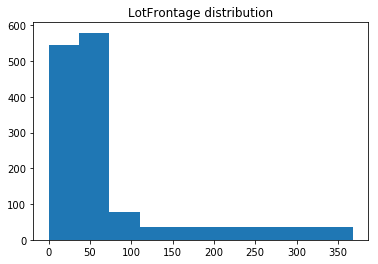

In [26]:
plt.hist(encoded_train_data['LotFrontage']);
plt.title('LotFrontage distribution');